In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('cleaned_data.csv')
df

,age,gender,knowent,opport,suskill,fearfail,bstart,exreason,nbmedia,nbstatus,discent
0,25,2,2,2,2,2,2,0,2,1,0
1,64,2,2,2,2,1,1,8,2,2,1
2,25,2,2,2,2,1,1,0,2,2,0
3,24,1,2,2,2,1,1,0,2,2,0
4,98,1,2,2,2,1,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
13739,38,2,2,2,2,2,1,0,2,2,0
13740,40,1,1,2,2,1,1,0,2,2,0
13741,19,2,1,2,2,2,1,0,2,1,0
13742,30,1,1,2,1,1,1,0,1,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13744 entries, 0 to 13743
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       13744 non-null  int64
 1   gender    13744 non-null  int64
 2   knowent   13744 non-null  int64
 3   opport    13744 non-null  int64
 4   suskill   13744 non-null  int64
 5   fearfail  13744 non-null  int64
 6   bstart    13744 non-null  int64
 7   exreason  13744 non-null  int64
 8   nbmedia   13744 non-null  int64
 9   nbstatus  13744 non-null  int64
 10  discent   13744 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


In [4]:
df.columns

Index(['age', 'gender', 'knowent', 'opport', 'suskill', 'fearfail', 'bstart',
       'exreason', 'nbmedia', 'nbstatus', 'discent'],
      dtype='object')

(11.5, -0.5)

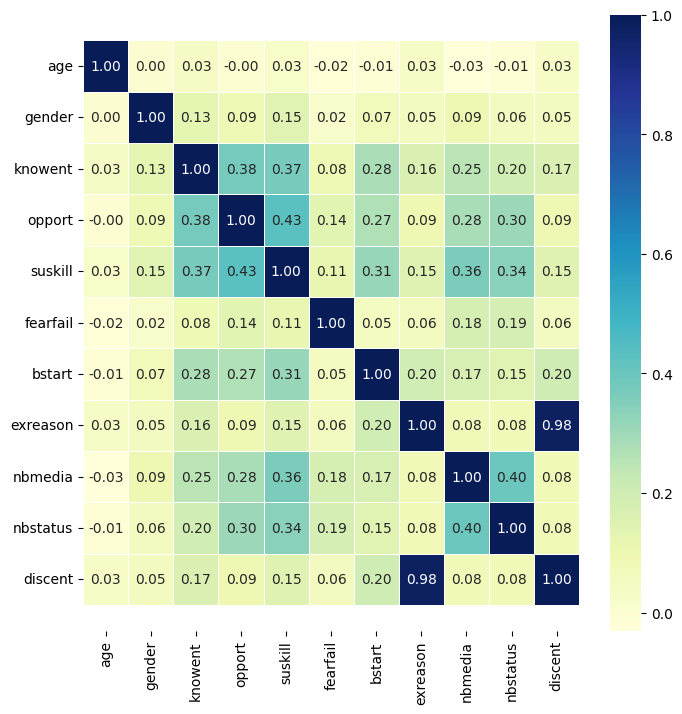

In [5]:
 #Let's make our correlation matrix a little prettier
corr_matrix = df[['age', 'gender', 'knowent', 'opport', 'suskill', 'fearfail', 'bstart','exreason', 'nbmedia', 'nbstatus', 'discent']].corr(method='spearman')
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix,
 annot=True,
 linewidths=0.5,
 fmt=".2f",
 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [6]:
category = pd.cut(df.age,bins=[18,25,35,45,55,65,99],labels=['18-24','25-34','35-44','45-54','55-64', '65+'])
df.insert(5,'Age-Group',category)


In [7]:
df

,age,gender,knowent,opport,suskill,Age-Group,fearfail,bstart,exreason,nbmedia,nbstatus,discent
0,25,2,2,2,2,18-24,2,2,0,2,1,0
1,64,2,2,2,2,55-64,1,1,8,2,2,1
2,25,2,2,2,2,18-24,1,1,0,2,2,0
3,24,1,2,2,2,18-24,1,1,0,2,2,0
4,98,1,2,2,2,65+,1,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13739,38,2,2,2,2,35-44,2,1,0,2,2,0
13740,40,1,1,2,2,35-44,1,1,0,2,2,0
13741,19,2,1,2,2,18-24,2,1,0,2,1,0
13742,30,1,1,2,1,25-34,1,1,0,1,2,0


In [8]:
df['discent'].value_counts()

discent
0    13060
1      684
Name: count, dtype: int64

<AxesSubplot: xlabel='gender'>

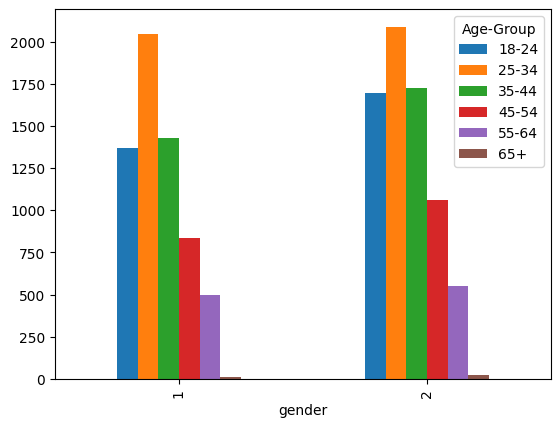

In [9]:
pd.crosstab(df.gender, df['Age-Group'], margins=False).plot(kind='bar')

discent
0    13060
1      684
Name: count, dtype: int64


<AxesSubplot: ylabel='count'>

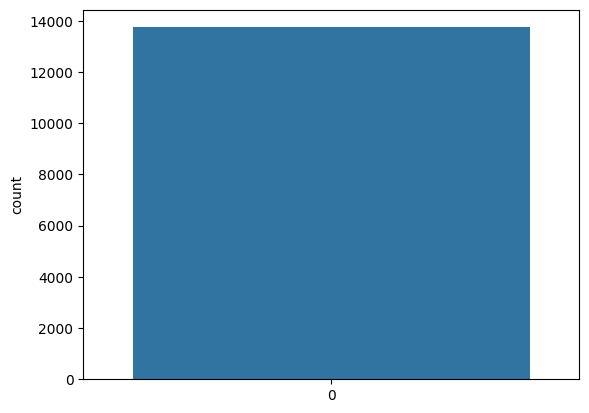

In [10]:
print(df.discent.value_counts())
sns.countplot(df.discent)


Text(0.5, 1.0, 'Percentage of EXIT in Business')

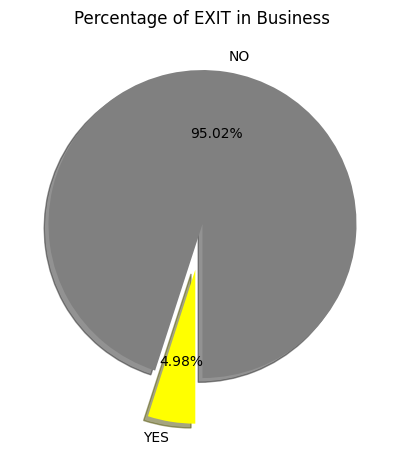

In [11]:
from pylab import rcParams
# Data to plot
sizes = df['discent'].value_counts(sort = True)
colors = ["grey","yellow"]
rcParams['figure.figsize'] = 5,5 # Plot
plt.pie(sizes, explode = (0,0.3), labels=["NO", "YES"], colors=colors, autopct='%.2f%%', shadow=True, startangle=270)
 
plt.title('Percentage of EXIT in Business')


In [12]:
df=df.drop(['Age-Group'],axis=1)

In [13]:
df

,age,gender,knowent,opport,suskill,fearfail,bstart,exreason,nbmedia,nbstatus,discent
0,25,2,2,2,2,2,2,0,2,1,0
1,64,2,2,2,2,1,1,8,2,2,1
2,25,2,2,2,2,1,1,0,2,2,0
3,24,1,2,2,2,1,1,0,2,2,0
4,98,1,2,2,2,1,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
13739,38,2,2,2,2,2,1,0,2,2,0
13740,40,1,1,2,2,1,1,0,2,2,0
13741,19,2,1,2,2,2,1,0,2,1,0
13742,30,1,1,2,1,1,1,0,1,2,0


In [14]:
x=df.drop(['discent'], axis=1)
y=df.discent

In [15]:
print(x.shape , y.shape)

(13744, 10) (13744,)


In [16]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=1)
# 0.25 x 0.8 = 0.2
print('valid', x_val.shape, y_val.shape)
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)


valid (2886, 10) (2886,)
Train (6734, 10) (6734,)
Test (4124, 10) (4124,)


In [17]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import sklearn
import imblearn

In [18]:
y_train.value_counts()


discent
0    6423
1     311
Name: count, dtype: int64

In [19]:
smt = SMOTE()
x_train , y_train = smt.fit_resample(x_train , y_train)


In [20]:
np.bincount(y_train)

array([6423, 6423], dtype=int64)

<AxesSubplot: ylabel='count'>

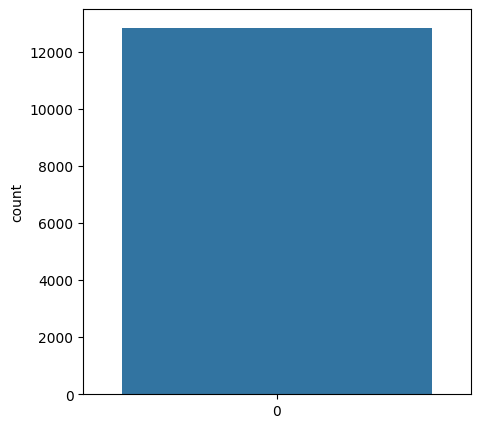

In [21]:
sns.countplot(y_train)

In [22]:
x_train.shape

(12846, 10)

In [23]:
y_train.value_counts()

discent
0    6423
1    6423
Name: count, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , average_precision_score , precision_recall_curve , f1_score ,roc_curve ,auc

In [25]:
 #LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
lm.score(x_test, y_test)

-0.5835607332295629

In [26]:
 #LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(x_train,y_train)
lr_pred=lr_c.predict(x_val)
lr_cm=confusion_matrix(y_val,lr_pred)
lr_ac=accuracy_score(y_val, lr_pred)

In [27]:
 #RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=
0)
rdf_c.fit(x_train,y_train)
rdf_pred=rdf_c.predict(x_val)
rdf_cm=confusion_matrix(y_val,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_val)

In [28]:
 # DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(x_train,y_train)
dtree_pred=dtree_c.predict(x_val)
dtree_cm=confusion_matrix(y_val,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_val)

In [29]:
 #XGBoost
XGB=XGBClassifier()
XGB.fit(x_train,y_train)
XGB_pred=XGB.predict(x_val)
XGB_cm=confusion_matrix(y_val,XGB_pred)
XGB_ac=accuracy_score(XGB_pred,y_val)

In [30]:
 #SVM
svm_c=SVC( C=1.0)
svm_c.fit(x_train,y_train)
svm_pred=svm_c.predict(x_val)
svm_cm=confusion_matrix(y_val,svm_pred)
svm_ac=accuracy_score(svm_pred,y_val)

<AxesSubplot: title={'center': 'svm_cm'}>

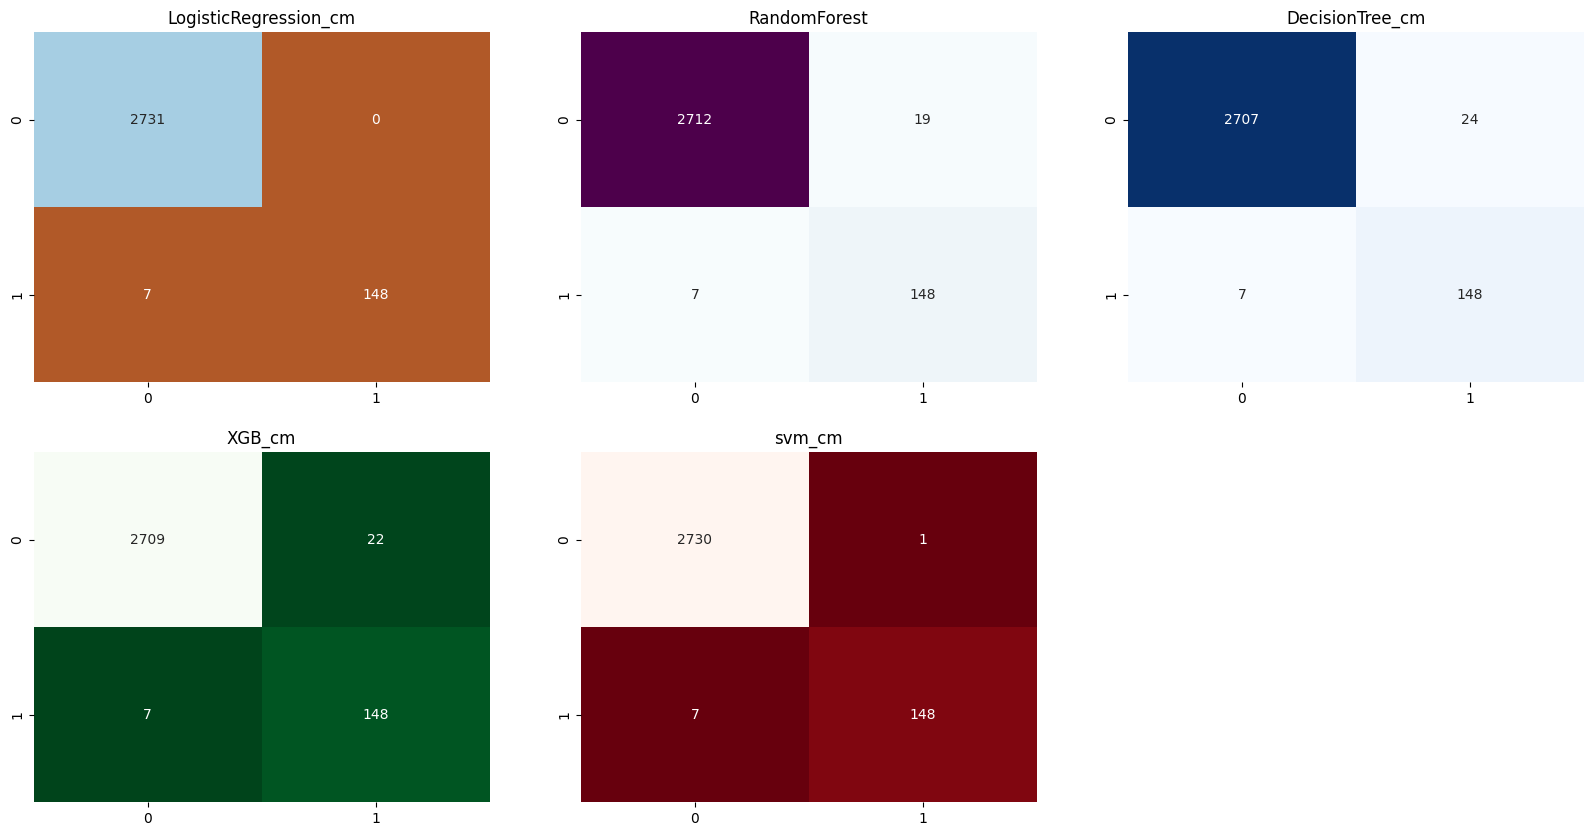

In [31]:
plt.figure(figsize=(20,10))
target_names = ["continue", "exit"]
plt.subplot(2,3,1)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Paired_r",fmt="d",cbar=False)
plt.subplot(2,3,2)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="BuPu",fmt="d",cbar=False)
plt.subplot(2,3,3)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,3,4)
plt.title("XGB_cm")
sns.heatmap(XGB_cm,annot=True,cmap="Greens_r",fmt="d",cbar=False)
plt.subplot(2,3,5)
plt.title("svm_cm")
sns.heatmap(svm_cm,annot=True,cmap="Reds_r",fmt="d",cbar=False)

In [32]:
print('LogisticRegression_accuracy:\t',lr_ac)
print('RandomForest_accuracy:\t\t',rdf_ac)
print('DecisionTree_accuracy:\t\t',dtree_ac)
print('XGB_accuracy:\t\t\t',XGB_ac)
print('SVM_accuracy:\t\t\t',svm_ac)

LogisticRegression_accuracy:	 0.9975744975744976
RandomForest_accuracy:		 0.990990990990991
DecisionTree_accuracy:		 0.9892584892584892
XGB_accuracy:			 0.98995148995149
SVM_accuracy:			 0.9972279972279973


In [33]:
def plotting(true,pred):
 fig,ax=plt.subplots(1,2,figsize=(10,5))
 
 precision,recall,threshold = precision_recall_curve(true,pred[:,1])
 ax[0].plot(recall,precision,'g--')
 ax[0].set_xlabel('Recall')
 ax[0].set_ylabel('Precision')
 ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
 
 fpr,tpr,threshold = roc_curve(true,pred[:,1])
 ax[1].plot(fpr,tpr)
 ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
 ax[1].plot([0,1],[0,1],'k--')
 ax[1].set_xlabel('False Positive Rate')
 ax[1].set_ylabel('True Positive Rate')

<Figure size 500x500 with 0 Axes>

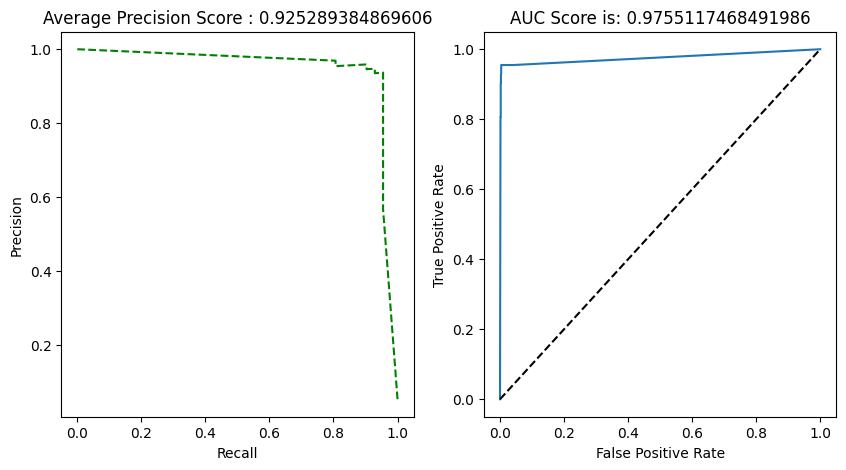

<Figure size 500x500 with 0 Axes>

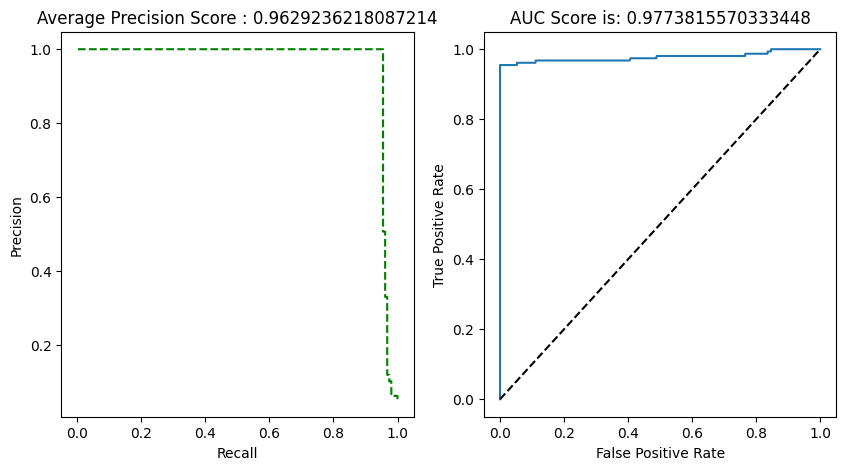

In [34]:
plt.figure()
plotting(y_val ,rdf_c.predict_proba(x_val))
plt.figure()
plotting(y_val ,XGB.predict_proba(x_val))


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, precision_recall_curve
print('precision_score of LR: ', precision_score(lr_pred, y_val))
print('precision_score of random forest : ', precision_score(rdf_pred, y_val))
print('precision_score of DTree: ', precision_score(dtree_pred, y_val))
print('precision_score of XGB: ', precision_score(XGB_pred, y_val))
print('precision_score of SVM: ', precision_score(svm_pred, y_val))


precision_score of LR:  0.9548387096774194
precision_score of random forest :  0.9548387096774194
precision_score of DTree:  0.9548387096774194
precision_score of XGB:  0.9548387096774194
precision_score of SVM:  0.9548387096774194


In [36]:
print('recall_score of LR: ', recall_score(lr_pred, y_val))
print('recall_score of random forest : ', recall_score(rdf_pred, y_val))
print('recall_score of DTree: ', recall_score(dtree_pred, y_val))
print('recall_score of XGB: ', recall_score(XGB_pred, y_val))
print('recall_score of SVM: ', recall_score(svm_pred, y_val))


recall_score of LR:  1.0
recall_score of random forest :  0.8862275449101796
recall_score of DTree:  0.8604651162790697
recall_score of XGB:  0.8705882352941177
recall_score of SVM:  0.9932885906040269


In [37]:
print('f1_score of LR: ', f1_score(lr_pred, y_val))
print('f1_score of random forest : ', f1_score(rdf_pred, y_val))
print('f1_score of DTree: ', f1_score(dtree_pred, y_val))
print('f1_score of XGB: ', f1_score(XGB_pred, y_val))
print('f1_score of SVM: ', f1_score(svm_pred, y_val))


f1_score of LR:  0.9768976897689768
f1_score of random forest :  0.9192546583850931
f1_score of DTree:  0.9051987767584098
f1_score of XGB:  0.9107692307692308
f1_score of SVM:  0.9736842105263157


LR: 0.997963 (0.000909)
random forest: 0.997454 (0.000934)
DTree: 0.996944 (0.001209)
XGB: 0.997890 (0.000888)
svm: 0.982465 (0.002652)


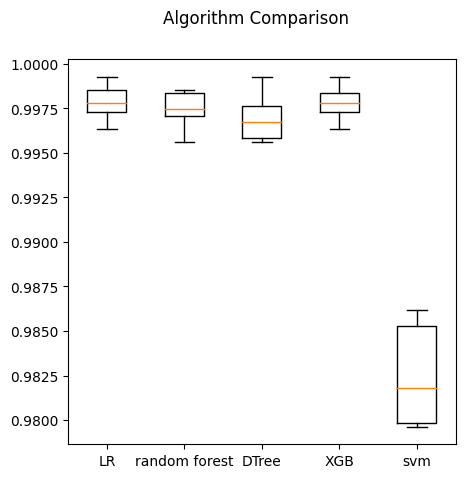

In [38]:
from sklearn import model_selection
dataframe = df
array = dataframe.values
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('random forest',RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)))
models.append(('DTree', DecisionTreeClassifier(criterion='entropy',random_state=0)))
models.append(('XGB', XGBClassifier()))
models.append(('svm' , SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
n_estimators = [500,800,1000,2000]
max_depth = [3,5,8,10,11]
min_samples_split = [3,5]
min_samples_leaf = [1]
hyperF = dict (n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split,
min_samples_leaf = min_samples_leaf)
gridF = GridSearchCV(rf , hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(x_train, y_train)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [40]:
gridF.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [41]:
gridF.best_score_


0.9936166900202398

In [42]:
model = RandomForestClassifier(n_estimators = 800, max_depth = 11, min_samples_split = 3,min_samples_leaf = 1)
model.fit(x_val, y_val)
model_pred=model.predict(x_val)
model_cm=confusion_matrix(y_val,model_pred)
model_ac=accuracy_score(model_pred,y_val)

In [43]:
print('RandomForest_accuracy:\t\t',model_ac)
print('recall_score : ', recall_score(model_pred, y_val))
print('precision_score : ', precision_score(model_pred, y_val))
print('f1_score : ', f1_score(model_pred, y_val))


RandomForest_accuracy:		 0.9982674982674983
recall_score :  1.0
precision_score :  0.967741935483871
f1_score :  0.9836065573770492


<AxesSubplot: >

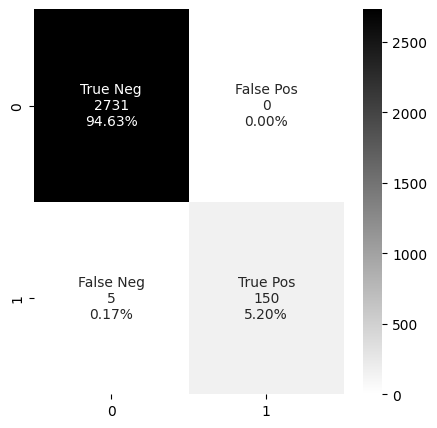

In [44]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
 model_cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
 model_cm.flatten()/np.sum(model_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(model_cm, annot=labels, fmt='', cmap='binary')

In [45]:
accuracy = model.score(x_test, y_test)
print("Accuracy is %.2f %%" %(accuracy * 100))


Accuracy is 99.76 %


In [46]:
pred_classes = model.predict(x_test)
print("Predicted classes:")
print(pred_classes)
print("Actual classes:")
print(y_test)

Predicted classes:
[0 0 0 ... 0 0 0]
Actual classes:
11700    0
9971     0
6577     0
1818     0
10809    0
        ..
7663     0
6803     0
5736     0
443      0
6534     0
Name: discent, Length: 4124, dtype: int64


In [47]:
from sklearn.metrics import roc_auc_score


In [48]:
y_pred = model.predict(x_test)
print("Roc_auc_score: ",roc_auc_score(y_test,y_pred)*100,"%")


Roc_auc_score:  97.70642201834863 %


In [49]:
model_T = RandomForestClassifier(n_estimators = 800, max_depth = 11, 
 min_samples_split = 3,
 min_samples_leaf = 1)
model_T.fit(x_test, y_test)
model_pred=model_T.predict(x_test)
model_cm=confusion_matrix(y_test,model_pred)
model_ac=accuracy_score(model_pred,y_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, precision_recall_curve
print('RandomForest_accuracy:\t\t',model_ac)
print('recall_score : ', recall_score(model_pred, y_test))
print('precision_score : ', precision_score(model_pred, y_test))
print('f1_score : ', f1_score(model_pred, y_test))


RandomForest_accuracy:		 0.9978176527643065
recall_score :  1.0
precision_score :  0.9587155963302753
f1_score :  0.9789227166276347


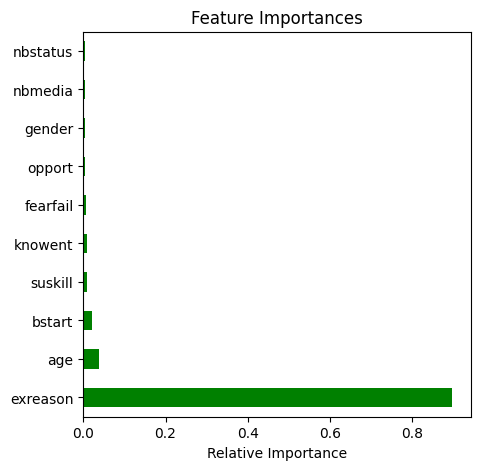

In [51]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh', color='g',)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()



In [52]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

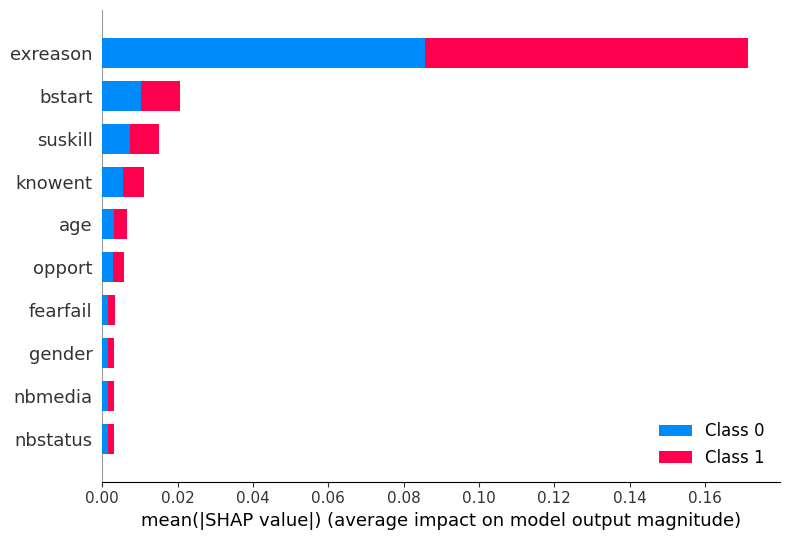

In [53]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [54]:
# save the model to disk with pickle
from pickle import dump
filename = 'finalized_RandomForest_GEM_model-E.sav'
dump(model, open(filename, 'wb'))


In [55]:
# load the model from disk with pickle
from pickle import load
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)


0.9975751697381183
